In [25]:
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
import numpy as np
import pandas as pd
from scipy import optimize
from scipy import stats
%matplotlib inline

In [3]:
plt.style.use("ggplot")

In [4]:
p_a = 3.0 / 10.0
p_b = 5.0 / 9.0
p_prior = 0.5
#0:blue, 1:red
data = [0, 1, 0, 1, 1, 1]

In [12]:
N_data = 7
likehood_a = bernoulli.pmf(data[:N_data], p_a)
likehood_b = bernoulli.pmf(data[:N_data], p_b)
likehood_a

array([0.7, 0.3, 0.7, 0.3, 0.3, 0.3])

([<matplotlib.axis.XTick at 0x7f0055d9ec10>,
 <a list of 2 Text xticklabel objects>)

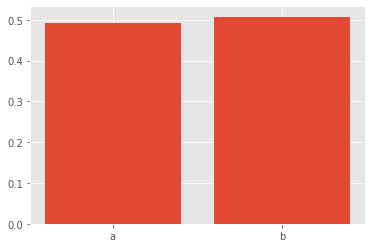

In [13]:
pa_posterior = p_prior
pb_posterior = p_prior
pa_posterior += np.prod(likehood_a)
pb_posterior += np.prod(likehood_b)
norm = pa_posterior + pb_posterior
df = pd.DataFrame([pa_posterior/norm, pb_posterior/norm], columns=["post"])
x = np.arange(df.shape[0])
plt.bar(x, df["post"])
plt.xticks(x, ["a", "b"])

In [16]:
df = pd.read_excel("data/MAP_sample.xlsx", index_col="id")
df.head

<bound method NDFrame.head of        value
id          
1   3.896195
2   5.865766
3   5.860887
4   4.660614
5   5.263595
..       ...
76  3.926554
77  5.062182
78  5.010742
79  5.257785
80  3.684627

[80 rows x 1 columns]>

(array([ 1.,  1.,  5., 12., 10., 18., 16.,  8.,  5.,  4.]),
 array([2.29193477, 2.77510498, 3.25827519, 3.74144541, 4.22461562,
        4.70778584, 5.19095605, 5.67412627, 6.15729648, 6.64046669,
        7.12363691]),
 <a list of 10 Patch objects>)

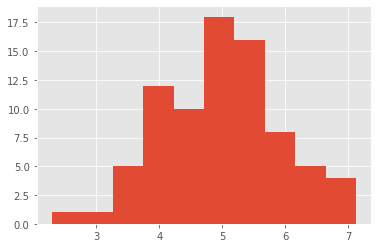

In [17]:
plt.hist(df["value"])

In [23]:
def likelihood(mu, *args):
    li = -np.log10(stats.norm.pdf(mu, loc=args))
    return(np.sum(li))

In [26]:
optimize.minimize(likelihood, 1, args=df["value"])

      fun: 47.655493188879284
 hess_inv: array([[0.02878231]])
      jac: array([4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([4.97609903])